In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the uploaded K-drama dataset
file_path = 'kdrama_list.csv'
kdrama_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
kdrama_data.head()


,ID,Name,Year,Genre,Main Cast,Sinopsis,Score,Content Rating,Tags,Network,img url,Episode
0,0,Move to Heaven,2021,"Life, Drama","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...",Han Geu Roo is an autistic 20-year-old. He wor...,9.2,18+ Restricted (violence & profanity),"Uncle-Nephew Relationship,, Autism,, Death,, S...",Netflix,https://i.mydramalist.com/Rle36_4c.jpg?v=1,10 episodes
1,1,Weak Hero Class 1,2022,"Action, Youth, Drama","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",Yeon Shi Eun is a model student who ranks at t...,9.1,18+ Restricted (violence & profanity),"Smart Male Lead,, Bromance,, School Bullying,,...","Wavve, iQIYI, Viki",https://i.mydramalist.com/pq2lr_4c.jpg?v=1,8 episodes
2,2,Hospital Playlist Season 2,2021,"Romance, Life, Drama, Medical","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",Everyday is extraordinary for five doctors and...,9.1,15+ - Teens 15 or older,"Multiple Mains,, Band,, Music,, Strong Female ...","TVING, Netflix",https://i.mydramalist.com/dKY0d_4c.jpg?v=1,12 episodes
3,3,Flower of Evil,2020,"Thriller, Romance, Crime, Melodrama","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Although Baek Hee Sung is hiding a dark secret...,9.1,15+ - Teens 15 or older,"Deception,, Family Secret,, Mystery,, Suspense...","Prime Video, Apple TV, Viki, Netflix",https://i.mydramalist.com/WAEAp_4c.jpg?v=1,16 episodes
4,4,Hospital Playlist,2020,"Romance, Life, Drama, Medical","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","""The stories of people going through their day...",9.1,15+ - Teens 15 or older,"Nice Male Lead,, Multiple Mains,, Slow Romance...",Netflix,https://i.mydramalist.com/RXXL6_4c.jpg?v=1,12 episodes


In [2]:
print(kdrama_data.columns)

Index(['ID', 'Name', 'Year', 'Genre', 'Main Cast', 'Sinopsis', 'Score',
       'Content Rating', 'Tags', 'Network', 'img url', 'Episode'],
      dtype='object')


In [3]:
def preprocess_data(data):
    """Preprocess the data by filling missing values and combining relevant features."""
    # Fill missing values in relevant columns with empty strings
    data['Genre'] = data['Genre'].fillna('')
    data['Sinopsis'] = data['Sinopsis'].fillna('')
    data['Tags'] = data['Tags'].fillna('')

    # Combine 'Genre', 'Sinopsis', and 'Tags' into a single string for each K-drama
    data['combined_features'] = data['Genre'] + ' ' + data['Sinopsis'] + ' ' + data['Tags']
    return data

In [4]:
# Preprocess the data
kdrama_data = preprocess_data(kdrama_data)

In [10]:
# Step 3: Data Visualization (Visualize trends in genres, ratings, etc.)

def visualize_data(data):
    """Visualize the K-drama data with plots."""
    # Plot the distribution of K-drama scores
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Score'], bins=20, kde=True, color='blue')
    plt.title('Distribution of K-drama Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    # Count plot of Content Rating
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Content Rating', order=data['Content Rating'].value_counts().index)
    plt.title('Content Rating Distribution')
    plt.xlabel('Content Rating')
    plt.ylabel('Count')
    # Rotate the x-axis labels and add spacing to prevent overlap
    plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align them to the right

    plt.show()

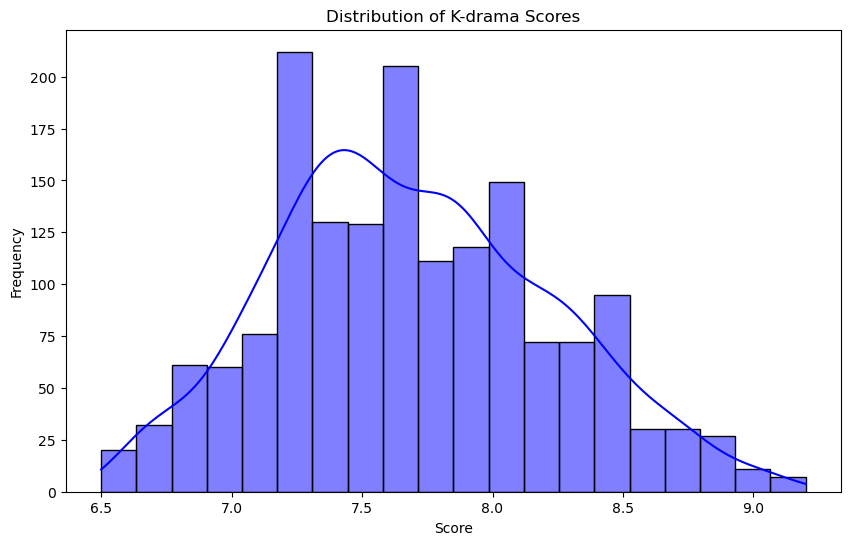

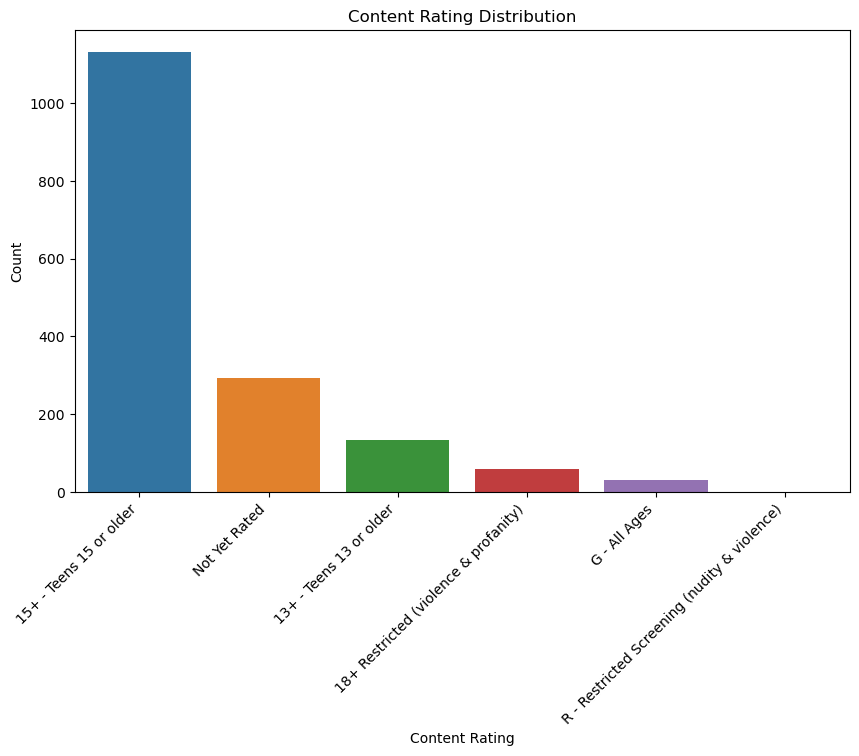

In [11]:
# Visualize the data
visualize_data(kdrama_data)

In [12]:
# Step 4: Model Building - TF-IDF Vectorization and Cosine Similarity

def build_similarity_model(data):
    """Build a content-based recommendation system using TF-IDF and cosine similarity."""
    # Initialize TF-IDF Vectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF to the combined features
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])

    # Compute cosine similarity between all K-dramas
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

# Build the similarity model
cosine_sim = build_similarity_model(kdrama_data)

In [13]:
# Step 5: Recommendation Function

def recommend_kdramas(title, data, cosine_sim, num_recommendations=5):
    """Recommend similar K-dramas based on the title."""
    # Get the index of the K-drama that matches the title
    try:
        idx = data.index[data['Name'] == title].tolist()[0]
    except IndexError:
        return "K-drama not found in the dataset."

    # Get similarity scores for all K-dramas
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort K-dramas based on similarity scores (in descending order)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the most similar K-dramas
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the input drama
    kdrama_indices = [i[0] for i in sim_scores]
    
    # Return the most similar K-dramas
    return data['Name'].iloc[kdrama_indices]

In [14]:
# Step 6: Test the Recommendation System

# Test the recommendation system with a sample title
print(recommend_kdramas('Move to Heaven', kdrama_data, cosine_sim))


658              Plus Nine Boys
64     Misaeng: Incomplete Life
775                 Entertainer
716            Feel Good to Die
276                          XX
Name: Name, dtype: object
